# AQI PREDICTION MODEL USING PYTHON



In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#LOADING DATA FILE
df=pd.read_csv(r"C:\Users\tatin\OneDrive\Desktop\DATA ANALYST\CSV files\air quality data(1).csv")

In [4]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [5]:
#FIRST FIVE ROWS OF DATA
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
#DIMENSIONS OF DATAFRAME
df.shape

(29531, 16)

In [7]:
#BASIC INFORMATION OF DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
#NO.OF DUPLICATES IN DATA
df.duplicated().sum()

0

In [9]:
#NO.OF NULL VALUES IN EACH COLUMNS
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [10]:
#REMOVING NULL VALUES FROM DATA
df.dropna(subset=['AQI'],inplace=True)

In [11]:
#NO.OF NULL VALUES IN DATA
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [12]:
#BASIC STATICS ON INTEGER VALUES OF COLUMNS AND TRANSPOSE IT
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [13]:
#PERCENTAGES OF NULL VALUES OF EACH COLUMNS
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

#VISUALISATION#

RuntimeError: Can not put single artist in more than one figure

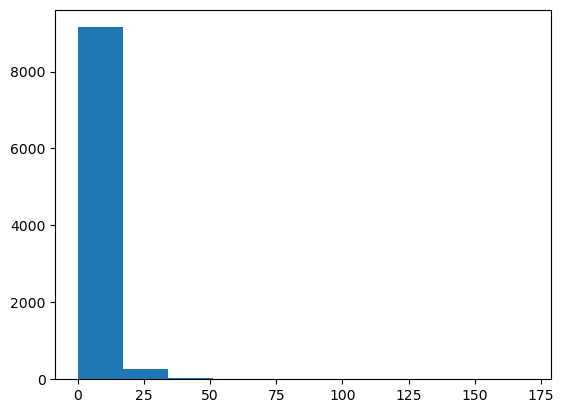

In [15]:
df['Xylene'].plot(kind='hist',figure=(10,5))
plt.legend()
plt.show()

RuntimeError: Can not put single artist in more than one figure

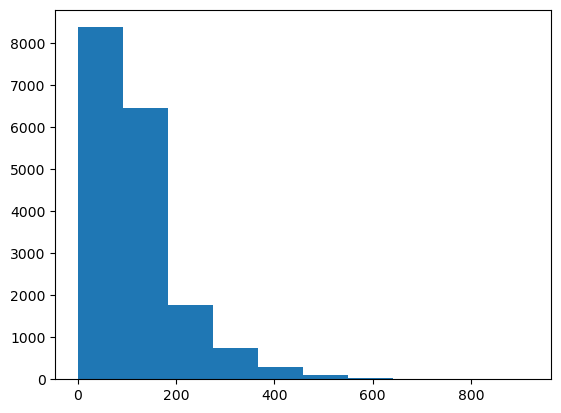

In [40]:
df['PM10'].plot(kind='hist',figure=(10,5))
plt.legend()
plt.show()

RuntimeError: Can not put single artist in more than one figure

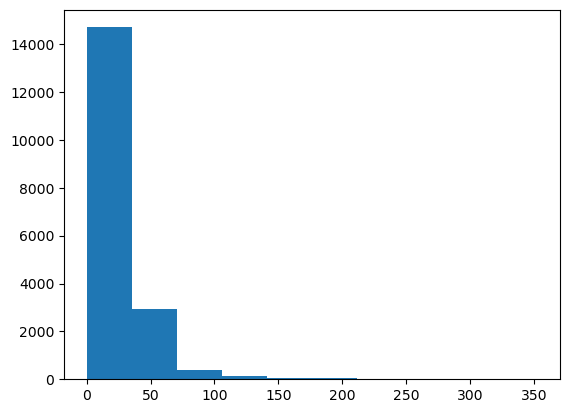

In [42]:
df['NH3'].plot(kind='hist',figure=(10,5))
plt.legend()
plt.show()

RuntimeError: Can not put single artist in more than one figure

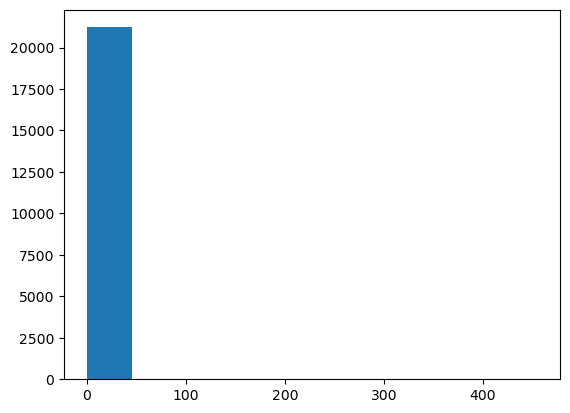

In [43]:
df['Benzene'].plot(kind='hist',figure=(10,5))
plt.legend()
plt.show()

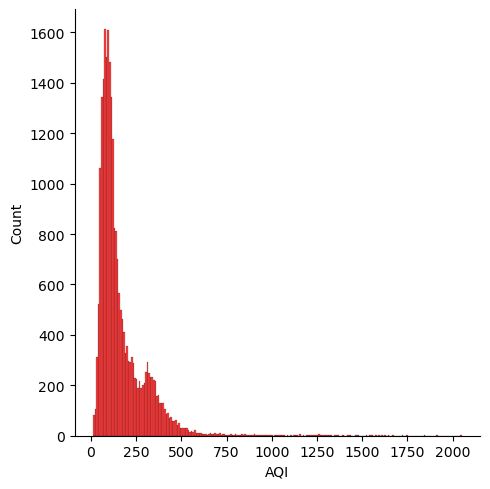

In [45]:
sns.displot(df, x='AQI',color='red')

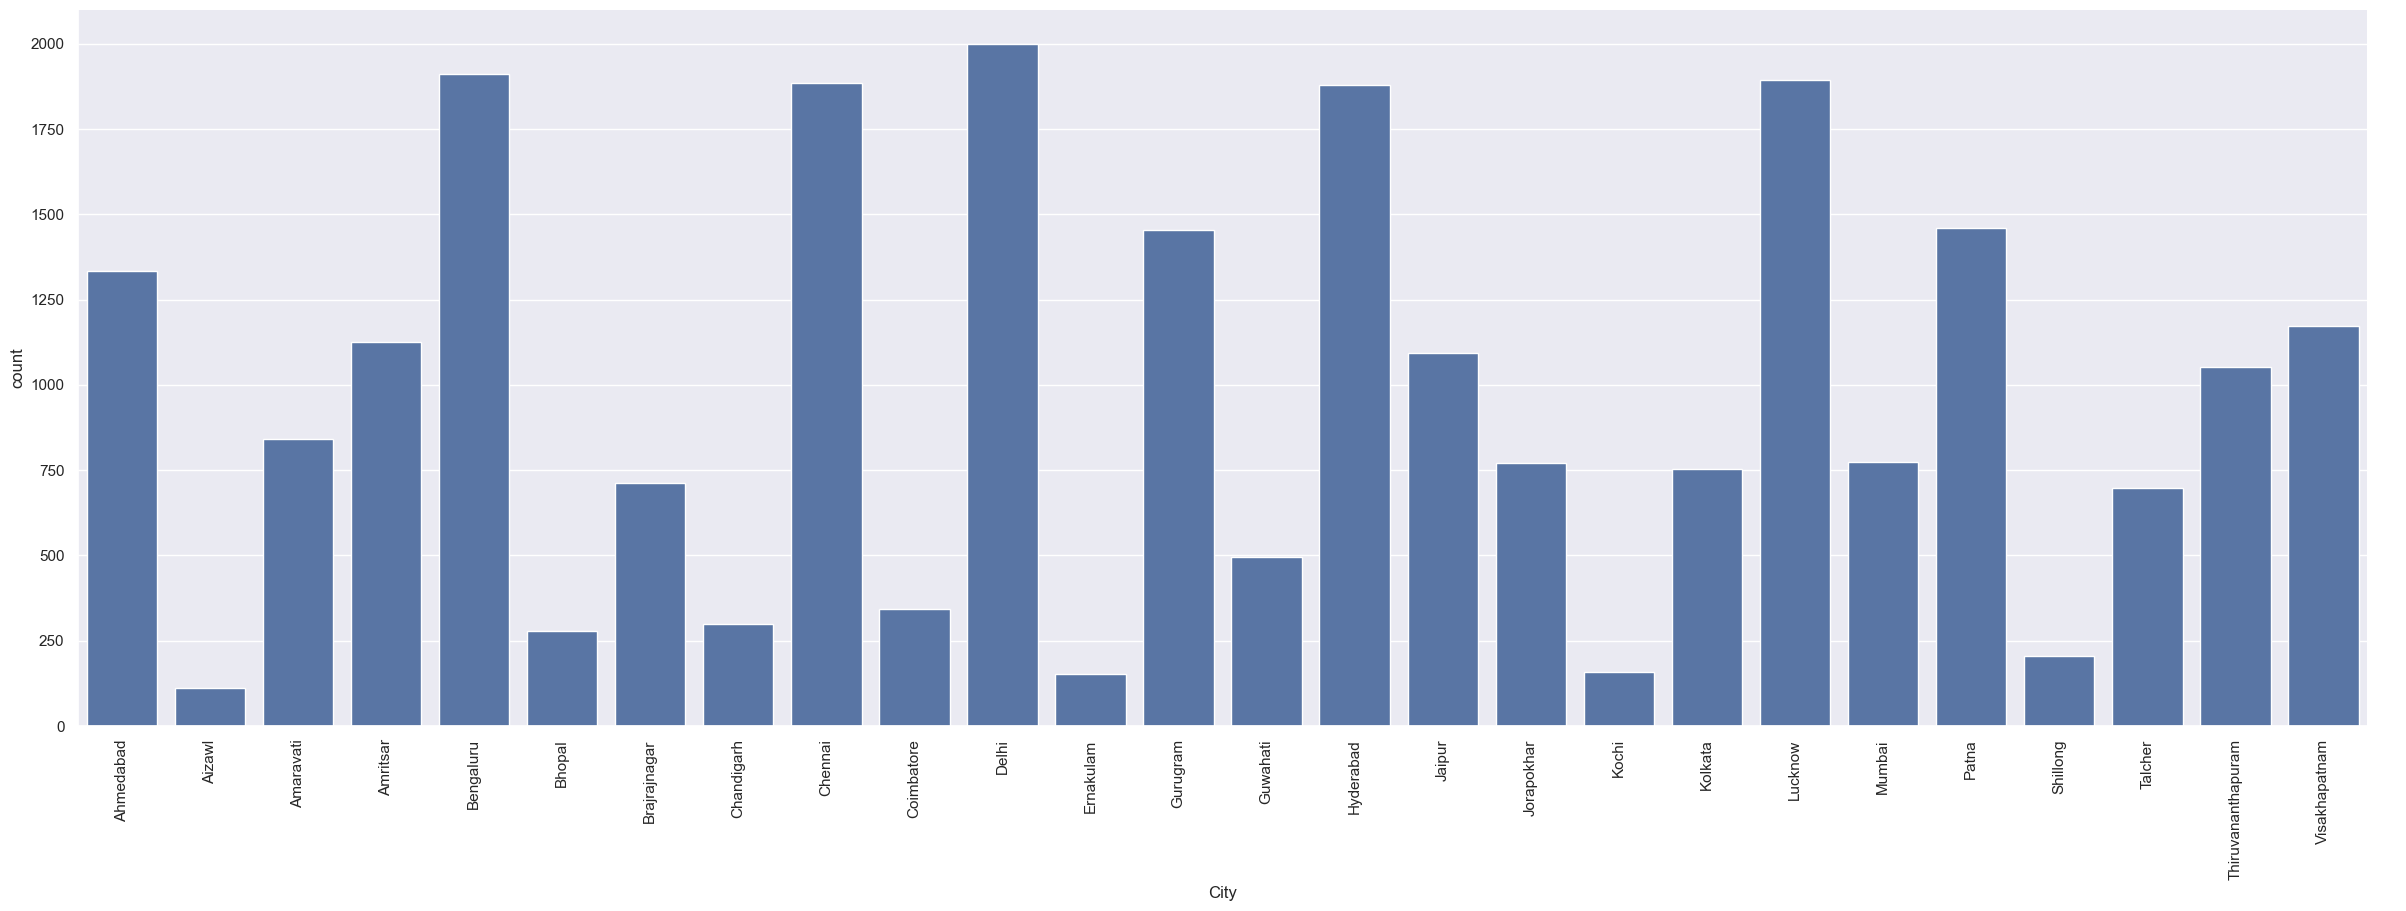

In [47]:
sns.set_theme(style='darkgrid')
graph = sns.catplot(x='City',kind='count',data=df,height=8,aspect=3)
graph.set_xticklabels(rotation=90)

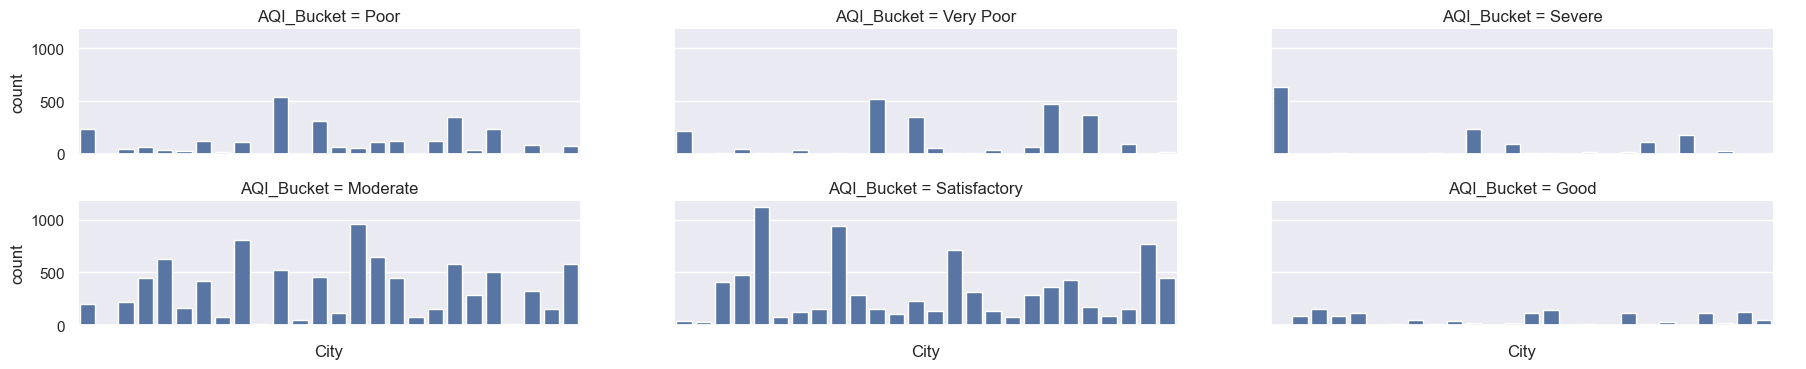

In [49]:
sns.set_theme(style='darkgrid')
graph = sns.catplot(x='City',kind='count',col='AQI_Bucket',col_wrap=3,data=df,height=2,aspect=3)
graph.set_xticklabels(rotation=90)

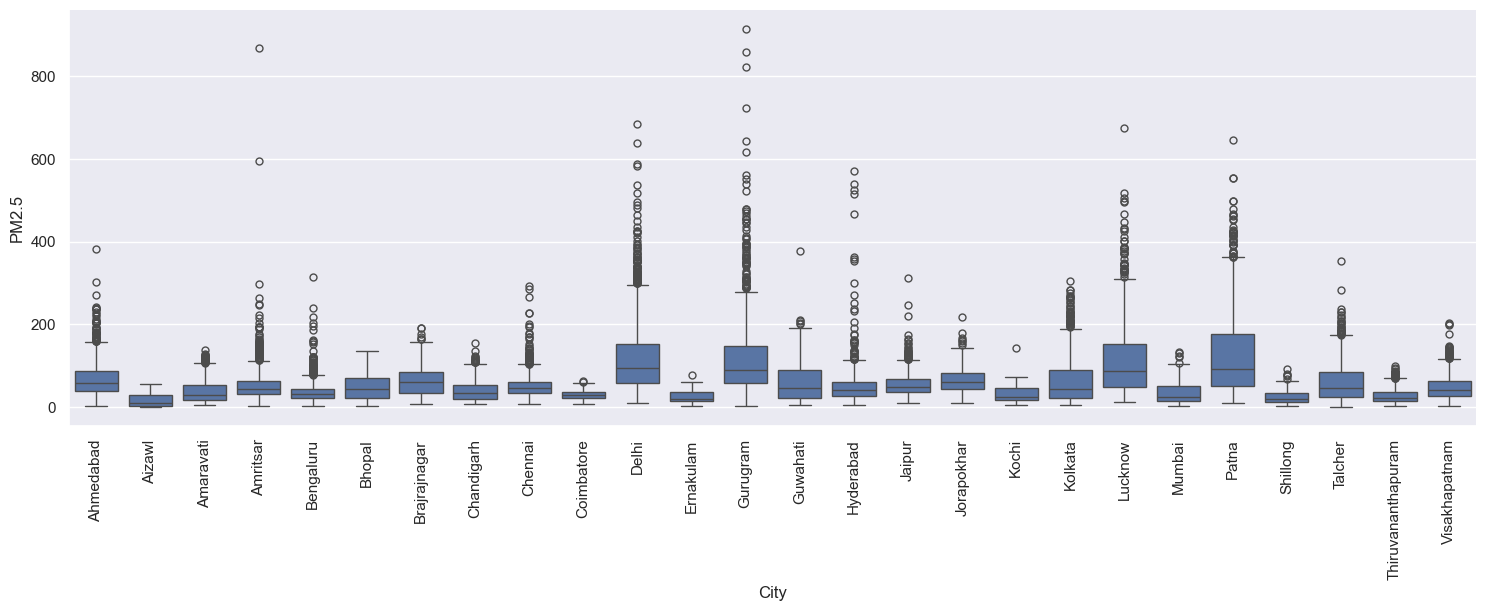

In [51]:
graph1=sns.catplot(x='City',y='PM2.5',kind='box',data=df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

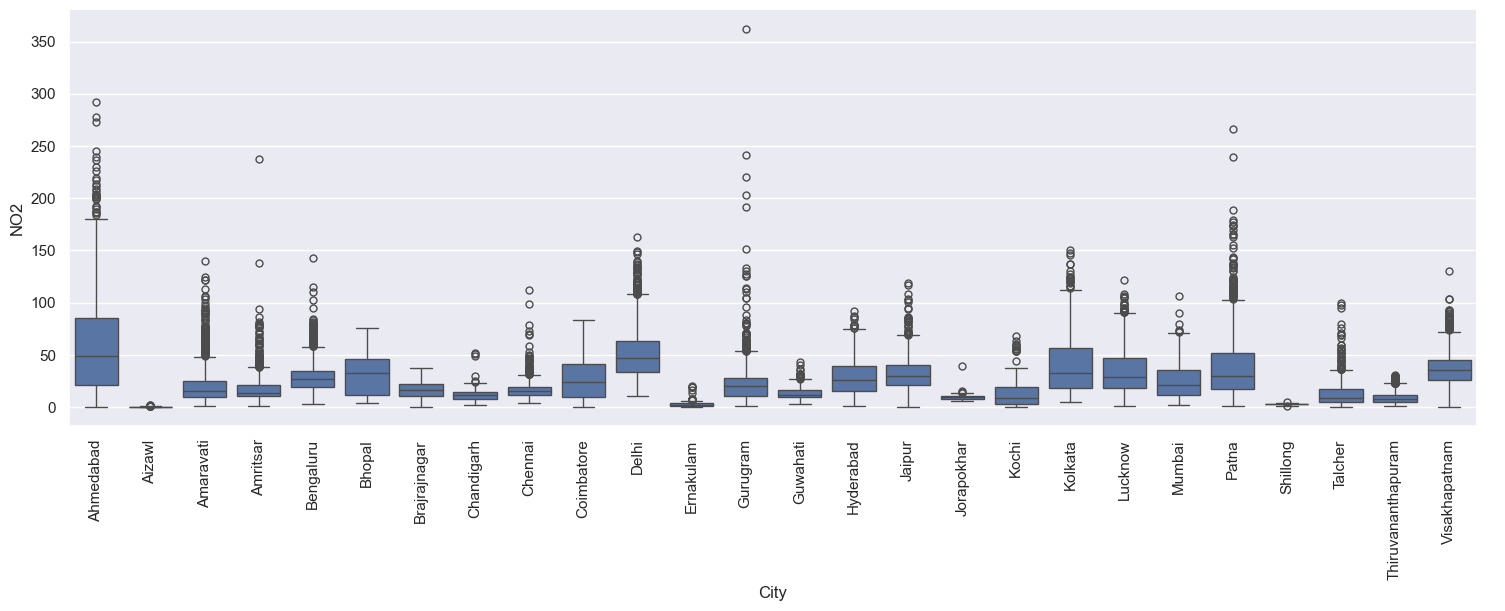

In [53]:
graph2=sns.catplot(x='City',y='NO2',kind='box',data=df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

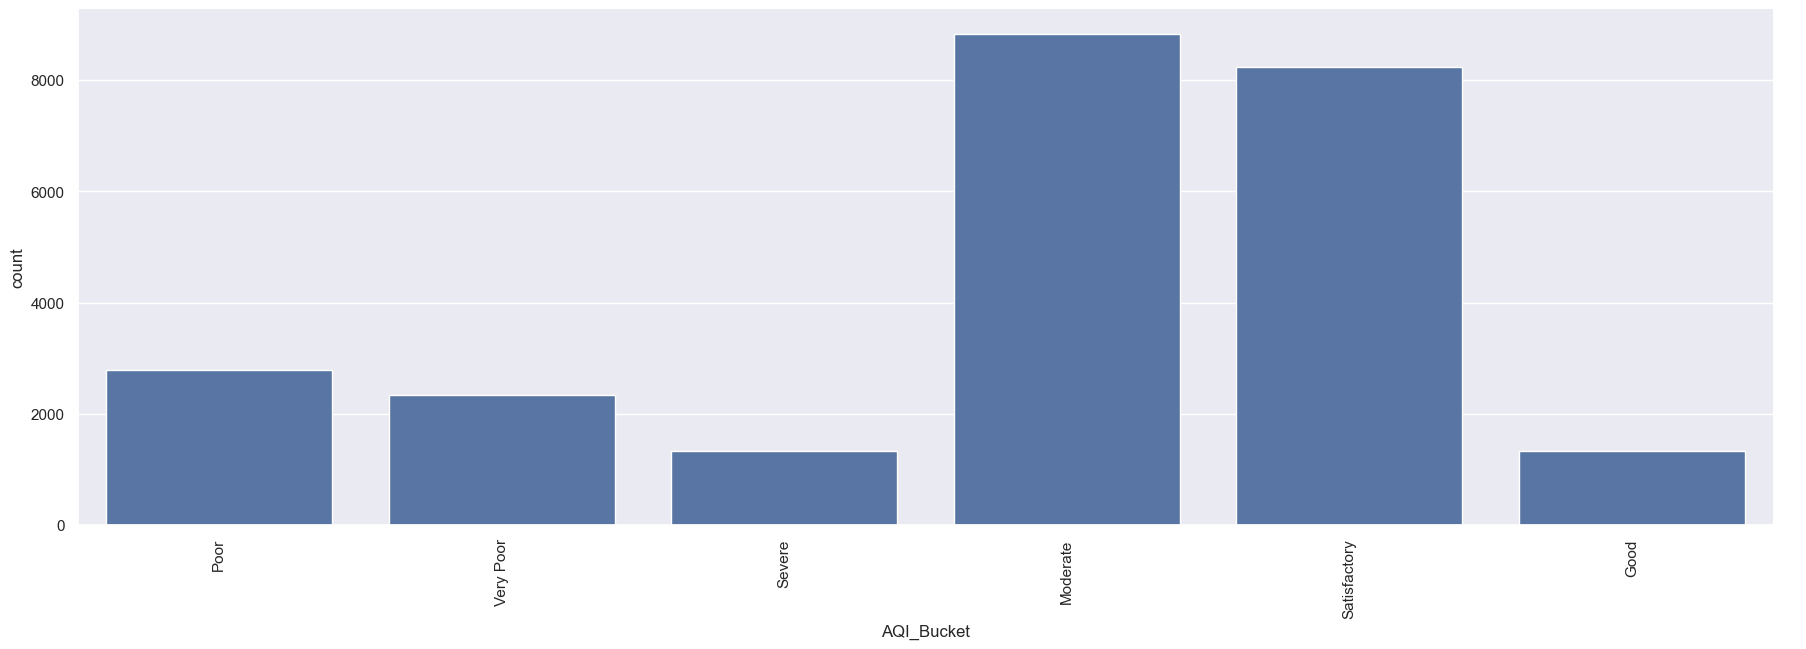

In [55]:
graph5=sns.catplot(x='AQI_Bucket',data=df,kind='count',height=6,aspect=3)
graph5.set_xticklabels(rotation=90)

In [57]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [59]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [61]:
df=df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
    "Toluene":{np.nan:9.525714},
    "Xylene":{np.nan:3.588683}
})

In [63]:
df.isnull().sum().sort_values(ascending=False)

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [65]:
df=df.drop(['AQI_Bucket'],axis=1)

In [67]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,1/29/2015,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,1/30/2015,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,1/31/2015,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2/1/2015,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2/2/2015,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

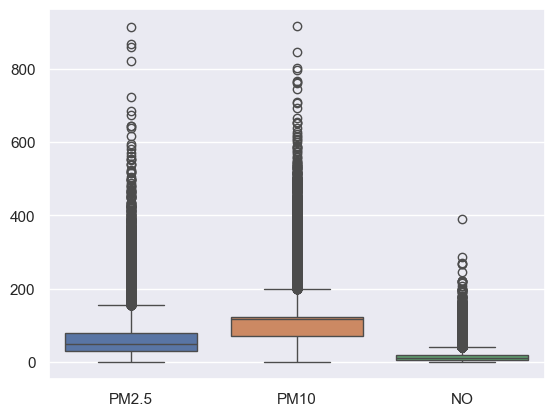

In [69]:
sns.boxplot(data=df[["PM2.5","PM10","NO"]])

<Axes: >

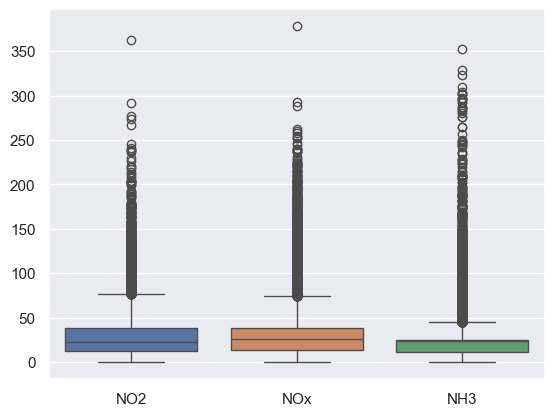

In [71]:
sns.boxplot(data=df[["NO2","NOx","NH3"]])

<Axes: >

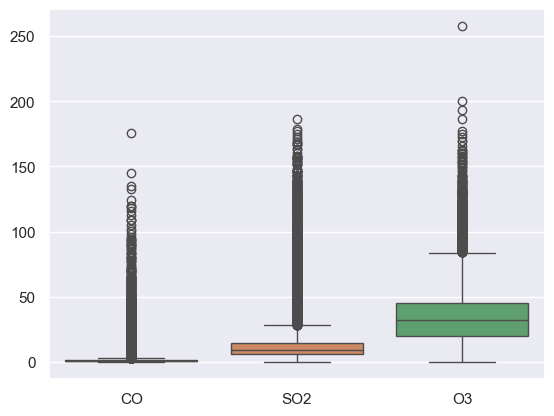

In [73]:
sns.boxplot(data=df[["CO","SO2","O3"]])

In [75]:
def outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1=df[column].quantile(0.25)
        Q2=df[column].quantile(0.75)
        IQR=Q2-Q1
        lb=Q1-1.5*IQR
        ub=Q2+1.5*IQR
        df[column]=df[column].apply(
            lambda x:Q1 if x < lb else (Q2 if x > ub else x)
        )
    return df    

In [77]:
df=outliers(df)


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.334743,5.680901,0.01,5.79,9.430000,14.890000,28.52
O3,24850.0,33.177781,17.487724,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<Axes: >

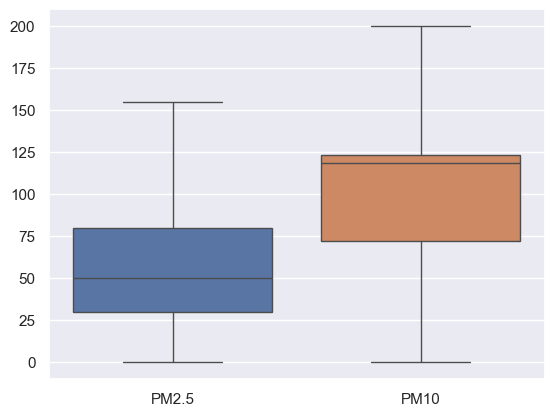

In [81]:
sns.boxplot(data=df[['PM2.5','PM10']])

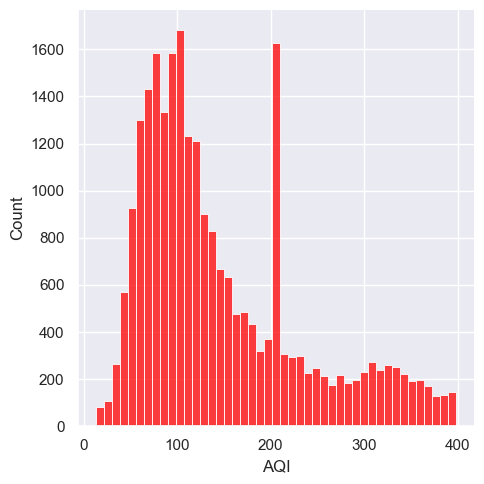

In [83]:
sns.displot(df,x='AQI',color='red')
plt.show()

In [85]:
df1=df.drop(columns=['City','Date'])

In [87]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


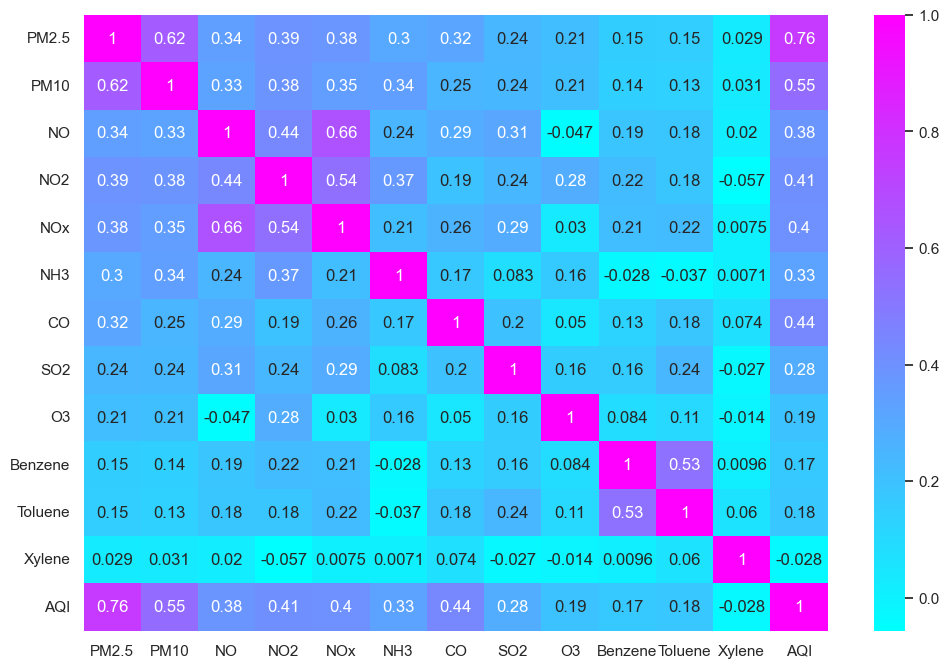

In [89]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,cmap='cool')
plt.show()

##week 3 modeling ##


In [92]:
df.drop(['Date','City'],axis=1,inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


In [94]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [100]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 4.2/124.9 MB 11.5 MB/s eta 0:00:11
   -- ------------------------------------- 6.8/124.9 MB 11.3 MB/s eta 0:00:11
   -- ------------------------------------- 9.2/124.9 MB 11.2 MB/s eta 0:00:11
   --- ------------------------------------ 10.7/124.9 MB 11.2 MB/s eta 0:00:11
   ---- ----------------------------------- 13.4/124.9 MB 10.8 MB/s eta 0:00:11
   ----- ---------------------------------- 16.8/124.9 MB 10.9 MB/s eta 0:00:10
   ------ --------------------------------- 19.1/124.9 MB 11.0 MB/s eta 0:00:10
   ------ --------------------------------- 21.5/124.9 MB 11.0 MB/s eta 0:00:10
   ------- -------------------------------- 23.9/124.9 MB 11.0 MB/s eta 0:00:10
   -------- ------------------------------- 26.2/124.9 MB 11.0 MB/s eta 0:00:09
   --------- ------------------------------ 28.8/124.

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error


In [106]:
X = df.drop('AQI', axis=1)
y = df['AQI']


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"R2 Score": r2, "MAE": mae}

# Display results
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="R2 Score", ascending=False))


                   R2 Score        MAE
Random Forest      0.845049  21.535452
XGBoost            0.836629  22.493643
Decision Tree      0.692897  29.023554
Linear Regression  0.656192  35.345770
SVM                0.637233  32.282973
